TypeError: 'MultiLineString' object is not iterable

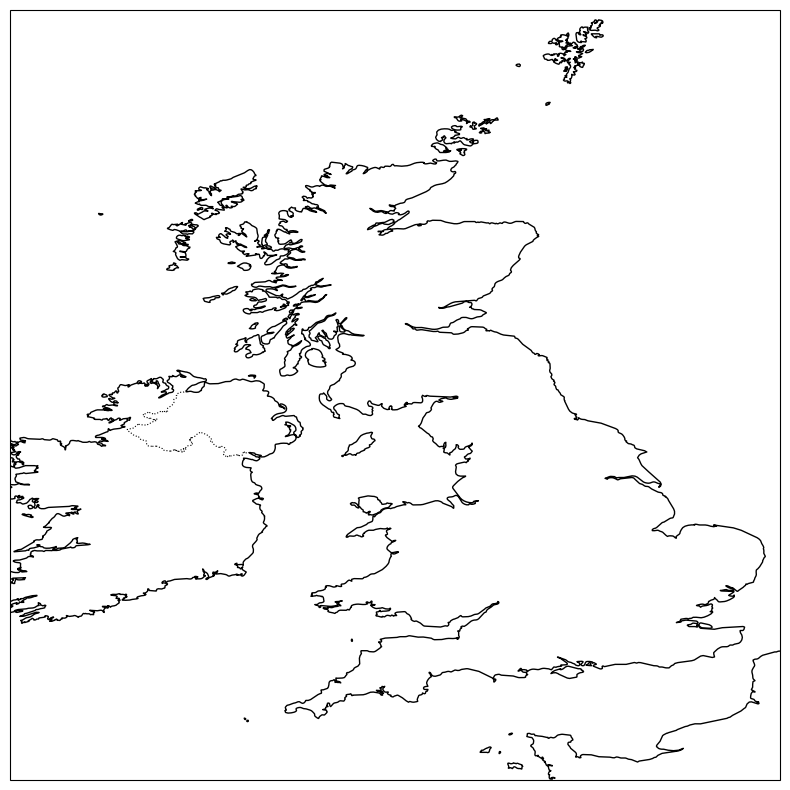

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd

# Load UK road network data (replace with your road shapefile or GeoJSON path)
roads = gpd.read_file('C:/Users/zicza/Downloads/Major_Road_Network_2018_Open_Roads/Major_Road_Network_2018_Open_Roads.shp')

# Create a map
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-10, 2, 49, 61], crs=ccrs.PlateCarree())  # Focus on UK

# Add natural features
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.8)

# Plot the road network
for geometry in roads['geometry']:
    if geometry.geom_type == 'LineString':  # For single road lines
        x, y = geometry.xy
        ax.plot(x, y, color='gray', linewidth=0.5, transform=ccrs.PlateCarree())
    elif geometry.geom_type == 'MultiLineString':  # For multiple road lines
        for line in geometry:
            x, y = line.xy
            ax.plot(x, y, color='gray', linewidth=0.5, transform=ccrs.PlateCarree())

# Example points to plot
lons = [-1.8262, -0.1278, -3.1883]  # Example: Birmingham, London, Edinburgh
lats = [52.4862, 51.5074, 55.9533]
ax.scatter(lons, lats, color='red', s=50, transform=ccrs.PlateCarree(), label='Cities')

# Add labels
for lon, lat, label in zip(lons, lats, ['Birmingham', 'London', 'Edinburgh']):
    plt.text(lon, lat, label, fontsize=10, transform=ccrs.PlateCarree(), ha='right')

plt.title('UK Map with Road Network', fontsize=15)
plt.legend()
plt.show()

In [ ]:
import osmnx as ox
import plotly.graph_objects as go
import numpy as np

# Fetch the road network for the UK
custom_filter = '["highway"~"motorway|primary|secondary"]'
graph = ox.graph_from_place("Yorkshire", network_type='drive', custom_filter=custom_filter)

# Convert the graph to a GeoDataFrame
gdf_nodes, gdf_edges = ox.graph_to_gdfs(graph)

# Your latitudes and longitudes
lons = [-1.8365, -2.0169, -1.8221, -1.7577, -1.5491, -0.127500,-0.5321,-1.10000,-2.4567]  # Longitudes for Bingley, Skipton, Ilkley, Bradford, Leeds
lats = [53.8466, 53.9590, 53.9258, 53.7926, 53.8008, 51.507220,52.1132,53.45000, 56.5400]  # Latitudes for Bingley, Skipton, Ilkley, Bradford, Leeds
labels = ['Bingley', 'Skipton', 'Ilkley', 'Bradford', 'Leeds','London','unknown_1','Unknown_2','unkown_3'] 
talent_number = [10,20,15,25,50,100,50,75,85]
talent_cost = [45,50,60,40,65,70,68,30,45]

# Calculate the zoom level based on the lat/lon range
lat_min, lat_max = min(lats), max(lats)
lon_min, lon_max = min(lons), max(lons)

# Calculate the center of the map (average lat, lon)
center_lat = (lat_max + lat_min) / 2
center_lon = (lon_max + lon_min) / 2

# Calculate the zoom level based on the lat/lon range
lat_range = lat_max - lat_min
lon_range = lon_max - lon_min
zoom_level = 10 #- max(lat_range, lon_range) * 2

# Create the map with Scattermapbox (using a heatmap-like color scale for talent_number)
fig = go.Figure(go.Scattermapbox(
    mode='markers',  # Use markers for the points
    lon=lons,
    lat=lats,
    text=labels,
    marker=dict(
        size=10,  # Size of the marker
        color=talent_cost,  # Color by talent_number
        colorscale='ylorrd',  # Use a built-in color scale (Yellow-Orange-Red)
        colorbar=dict(title='Talent Cost'),  # Colorbar to indicate scale
        showscale=True  # Show the scale on the map
    ),
    showlegend=False
))

# Update layout with OpenStreetMap
fig.update_layout(
    mapbox=dict(
        style="carto-positron",  # OpenStreetMap for free mapping
        center={"lat": sum(lats) / len(lats), "lon": sum(lons) / len(lons)},  # Center map around the average lat, lon
        zoom=zoom_level
    ),
    title="Talent Distribution on OpenStreetMap"
)

fig.update_layout(
    width=600,
    height=600
)

# Show the map
fig.show()


: 